In [1]:
import pandas as pd 
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from subprocess import check_output

In [2]:
pip install scikit-learn==1.3.0

Note: you may need to restart the kernel to use updated packages.


In [3]:
# loading the data set fron the csv file
df = pd.read_csv('Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#deleting id coloumn as it's not neeeded as we have index
df = df.drop(columns = ['Id'])
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
 df.shape

(150, 5)

In [8]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
# ________________ preprocessing data______________
# checking null values , checking null count
df.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.Species.value_counts

<bound method IndexOpsMixin.value_counts of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object>

In [11]:
x= df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y= df['Species']

<Axes: >

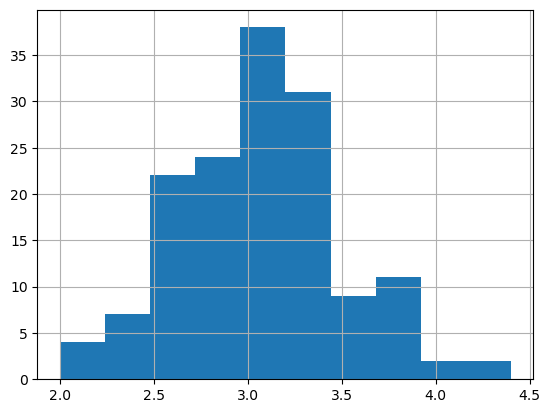

In [12]:
df['SepalWidthCm'].hist()


<Axes: >

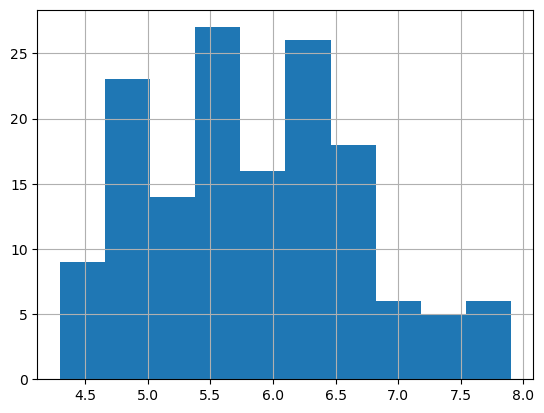

In [13]:
#____________________data analysis_____________
#visulazing data using histogram

df['SepalLengthCm'].hist()


<Axes: >

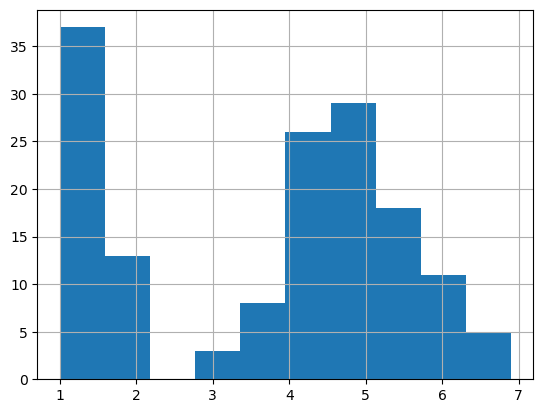

In [14]:
df['PetalLengthCm'].hist()


<Axes: >

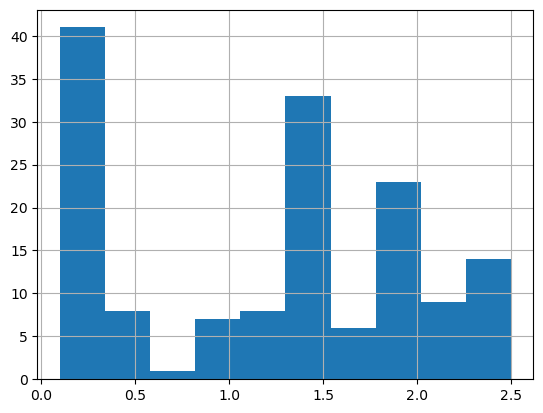

In [15]:
df['PetalWidthCm'].hist()

In [16]:
#_______ difrerenciate between folower based on color ____
colors =['green','blue','red']
Species =['Iris-setosa','Iris-versicolor','Iris-virginica']

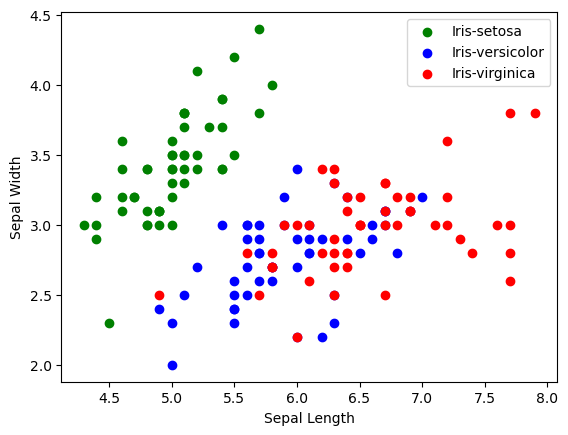

In [17]:
for i in range(3):
    # filetr data of classification
    x=df [df ['Species'] == Species[i]]
    # plotiing the scatter plot
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c = colors[i], label= Species[i])
    
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()# top right box (keys)

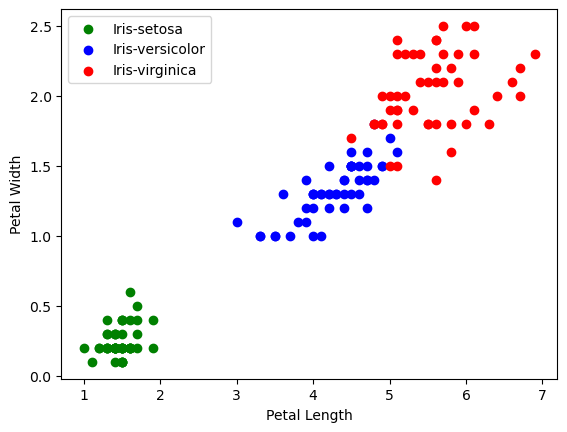

In [18]:
#____plotting same scatter plot for petal length and petal width__
for i in range(3):
    # filetr data of classification
    x=df [df ['Species'] == Species[i]]
    # plotiing the scatter plot
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c = colors[i], label= Species[i])
    
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()# top left box (keys)

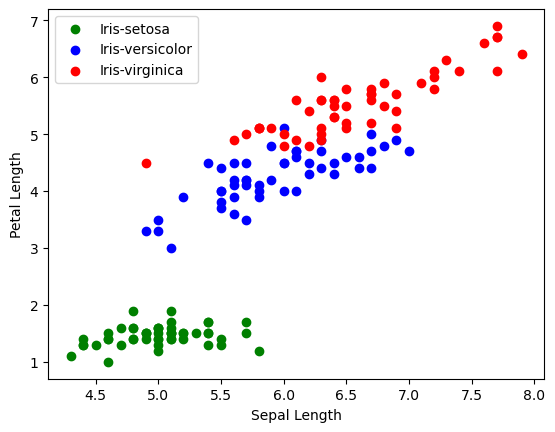

In [19]:
#____plotting same scatter plot for petal length and sepal length__
for i in range(3):
    # filetr data of classification
    x=df [df ['Species'] == Species[i]]
    # plotiing the scatter plot
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c = colors[i], label= Species[i])
    
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()# top left box (keys)

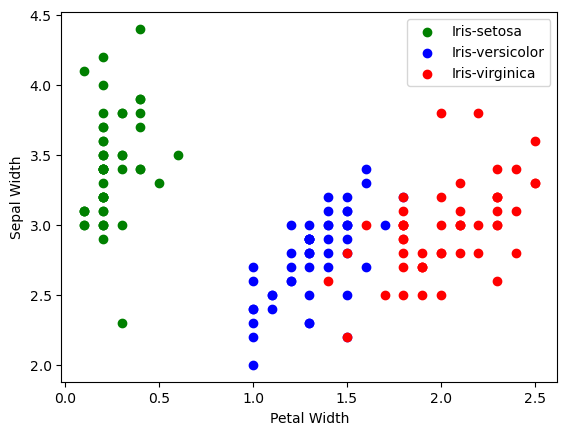

In [20]:
#____plotting same scatter plot for petal width and sepal width__
for i in range(3):
    # filetr data of classification
    x=df [df ['Species'] == Species[i]]
    # plotiing the scatter plot
    plt.scatter(x['PetalWidthCm'],x['SepalWidthCm'],c = colors[i], label= Species[i])
    
plt.xlabel("Petal Width")
plt.ylabel("Sepal Width")
plt.legend()# top left box (keys)

In [21]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# input data
X = df.drop(columns=['Species'])
# output data
Y = df['Species']
# split the data for train and test
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.20)
# Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
print("Logistic Regression Accuracy: ", model.score(x_test, y_test)* 100)


Logistic Regression Accuracy:  93.33333333333333


In [23]:
# model training
model. fit(x_train.values, y_train.values)

LogisticRegression()

In [24]:
# print metric to get performance
print ("Accuracy: ",model. score(x_test, y_test) * 100)



Accuracy:  93.33333333333333


In [25]:
# K-nearest neighbors
model = KNeighborsClassifier()
model. fit(x_train.values, y_train.values)
print("K-nearest neighbors Accuracy: ", model.score(x_test, y_test)*100)


K-nearest neighbors Accuracy:  90.0


In [26]:
model.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [27]:
print ("Accuracy: ",model. score(x_test, y_test) * 100)

Accuracy:  90.0


In [28]:
import pickle
filename = 'saved_model.pkl'
pickle.dump (model, open(filename, 'wb'))

In [29]:
# Save the updated model
filename = 'saved_model.pkl'
try:
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print("Model saved successfully.")
except Exception as e:
    print(f"Error saving the model: {e}")

Model saved successfully.


In [30]:
load_model = pickle.load(open(filename, 'rb'))
load_model. predict([[6.0, 2.2, 4.0, 1.0]])

array(['Iris-versicolor'], dtype=object)

In [31]:
x_test.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
65,6.7,3.1,4.4,1.4
70,5.9,3.2,4.8,1.8
19,5.1,3.8,1.5,0.3
145,6.7,3.0,5.2,2.3
87,6.3,2.3,4.4,1.3


In [32]:
load_model. predict([[3,2,5,4]])

array(['Iris-virginica'], dtype=object)